In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df=pd.read_csv('fund_allocation_dataset.csv')
df

,Income,Age,Risk_Appetite,Net_Worth,Investment_Horizon,Stock_Allocation,Bond_Allocation,FD_Allocation,ETF_Allocation,Cash_Allocation,Other_Allocation,Expected_Return,Portfolio_Volatility
0,89274.50,43,High,897187.11,18,66.14,8.77,5.47,17.74,1.69,0.19,10.00,15.77
1,53717.19,30,High,542263.50,30,66.61,6.30,3.24,9.53,0.71,13.60,10.86,15.75
2,100735.21,48,Medium,311162.99,19,36.73,17.18,13.13,18.82,14.07,0.07,7.06,11.83
3,202911.20,32,Medium,815671.24,30,39.82,26.45,9.67,13.20,8.68,2.18,7.81,13.90
4,49750.57,48,Medium,404659.56,18,30.49,23.20,6.90,17.05,9.56,12.80,7.19,12.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,131934.38,27,Low,1171742.65,30,11.30,29.81,14.52,8.12,30.36,5.89,4.29,9.70
17996,32062.83,34,Medium,268191.03,30,33.22,26.30,6.91,10.20,10.71,12.65,5.45,11.51
17997,112454.52,44,Medium,575636.94,14,31.63,24.75,11.46,11.17,9.20,11.79,6.69,13.58
17998,23924.45,50,Low,109529.48,14,17.85,30.84,19.65,6.72,16.97,7.97,4.90,9.75


In [4]:
df.isnull().sum()

Income                  0
Age                     0
Risk_Appetite           0
Net_Worth               0
Investment_Horizon      0
Stock_Allocation        0
Bond_Allocation         0
FD_Allocation           0
ETF_Allocation          0
Cash_Allocation         0
Other_Allocation        0
Expected_Return         0
Portfolio_Volatility    0
dtype: int64

In [5]:
df = pd.read_csv('fund_allocation_dataset.csv')
df[['Stock_Allocation', 'Bond_Allocation', 'FD_Allocation', 'ETF_Allocation', 'Cash_Allocation', 'Other_Allocation']].describe()


,Stock_Allocation,Bond_Allocation,FD_Allocation,ETF_Allocation,Cash_Allocation,Other_Allocation
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,31.299816,22.803006,13.745099,11.520147,14.065503,6.566403
std,17.393393,10.017097,7.667790,4.207715,7.365908,4.062734
min,4.570000,0.010000,0.000000,3.990000,0.000000,0.000000
25%,16.190000,16.180000,7.997500,7.900000,8.310000,3.240000
50%,32.910000,23.805000,12.600000,11.040000,12.600000,6.340000
75%,41.730000,30.220000,19.800000,14.900000,19.760000,9.340000
max,82.390000,49.150000,36.080000,25.950000,37.740000,22.810000


In [6]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Stock_Allocation','Bond_Allocation','FD_Allocation','ETF_Allocation','Cash_Allocation','Other_Allocation'],axis=1),
                                                 df[['Stock_Allocation', 'Bond_Allocation', 'FD_Allocation',
        'ETF_Allocation', 'Cash_Allocation', 'Other_Allocation']],
                                                 test_size=0.2,
                                                 random_state=0)

In [7]:
X_train

,Income,Age,Risk_Appetite,Net_Worth,Investment_Horizon,Expected_Return,Portfolio_Volatility
2465,122019.06,28,Medium,1028118.07,30,8.55,14.11
8461,20000.00,41,Medium,89501.04,22,7.04,12.98
13734,135844.53,53,Medium,832438.03,12,6.62,12.56
965,189888.74,49,Medium,874813.87,12,7.34,13.45
4615,46834.72,50,Medium,483361.22,16,7.30,12.80
...,...,...,...,...,...,...,...
9225,69341.35,41,Low,397864.97,25,3.86,9.22
13123,58826.15,55,Medium,259509.17,8,7.86,13.28
9845,49573.68,45,Low,481961.97,20,4.54,7.55
10799,159587.27,46,Medium,1375721.73,19,7.10,13.27


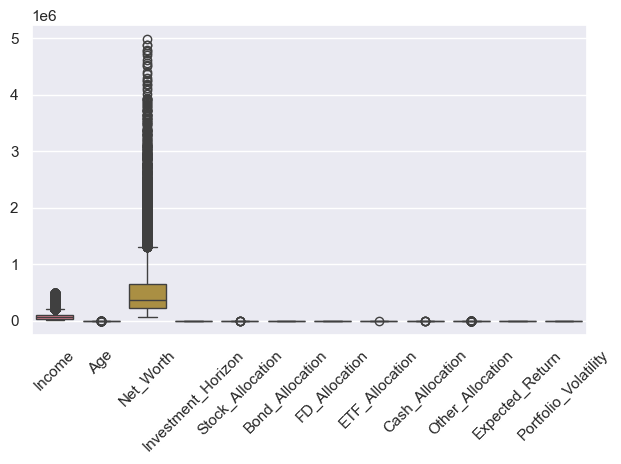

In [8]:
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()       # Adjust layout to prevent cutting off labels
plt.show()

In [9]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Loop through columns and apply Shapiro-Wilk test
for col in numeric_cols:
    try:
        stat, p = shapiro(df[col].dropna())  # dropna() avoids errors from missing values
        print(f"Column: {col}")
        print(f"  Shapiro-Wilk stat = {stat:.3f}, p = {p:.3f}")
        if p > 0.05:
            print("  ✅ Likely normal (fail to reject H0)\n")
        else:
            print("  ❌ Not normal (reject H0)\n")
    except Exception as e:
        print(f"⚠️ Error testing {col}: {e}\n")


Column: Income
  Shapiro-Wilk stat = 0.753, p = 0.000
  ❌ Not normal (reject H0)

Column: Age
  Shapiro-Wilk stat = 0.989, p = 0.000
  ❌ Not normal (reject H0)

Column: Net_Worth
  Shapiro-Wilk stat = 0.722, p = 0.000
  ❌ Not normal (reject H0)

Column: Investment_Horizon
  Shapiro-Wilk stat = 0.842, p = 0.000
  ❌ Not normal (reject H0)

Column: Stock_Allocation
  Shapiro-Wilk stat = 0.945, p = 0.000
  ❌ Not normal (reject H0)

Column: Bond_Allocation
  Shapiro-Wilk stat = 0.981, p = 0.000
  ❌ Not normal (reject H0)

Column: FD_Allocation
  Shapiro-Wilk stat = 0.974, p = 0.000
  ❌ Not normal (reject H0)

Column: ETF_Allocation
  Shapiro-Wilk stat = 0.962, p = 0.000
  ❌ Not normal (reject H0)

Column: Cash_Allocation
  Shapiro-Wilk stat = 0.966, p = 0.000
  ❌ Not normal (reject H0)

Column: Other_Allocation
  Shapiro-Wilk stat = 0.973, p = 0.000
  ❌ Not normal (reject H0)

Column: Expected_Return
  Shapiro-Wilk stat = 0.967, p = 0.000
  ❌ Not normal (reject H0)

Column: Portfolio_Volati

C:\Users\tanish\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\3337626576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


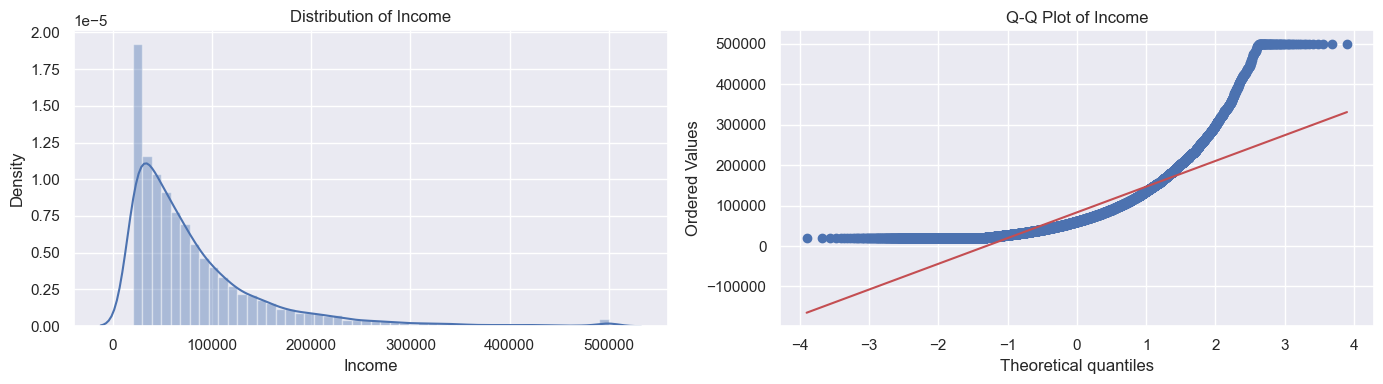

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\3337626576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


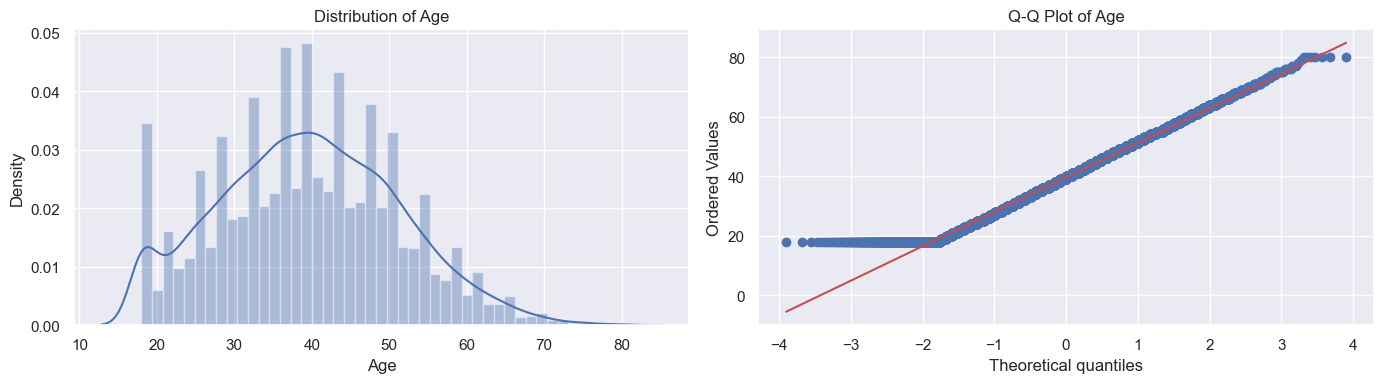

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\3337626576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


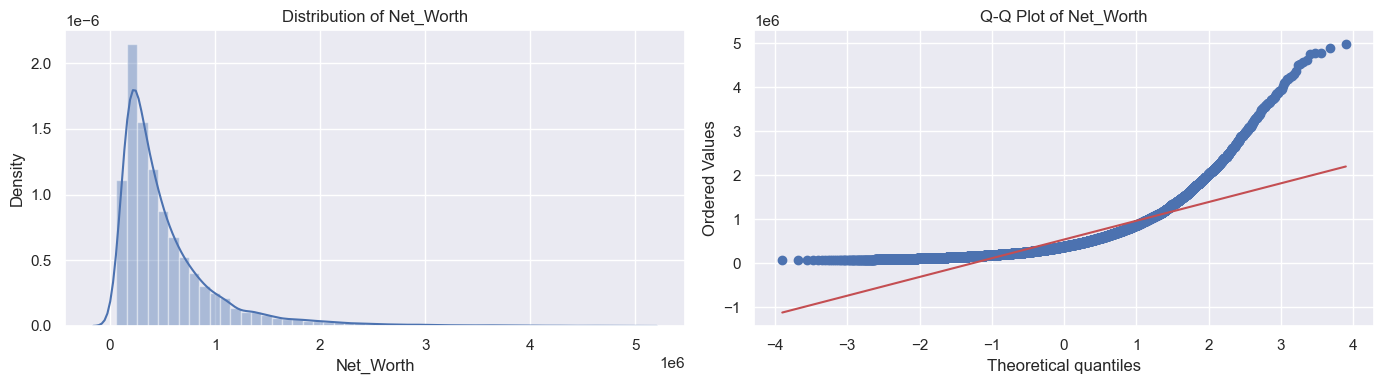

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\3337626576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


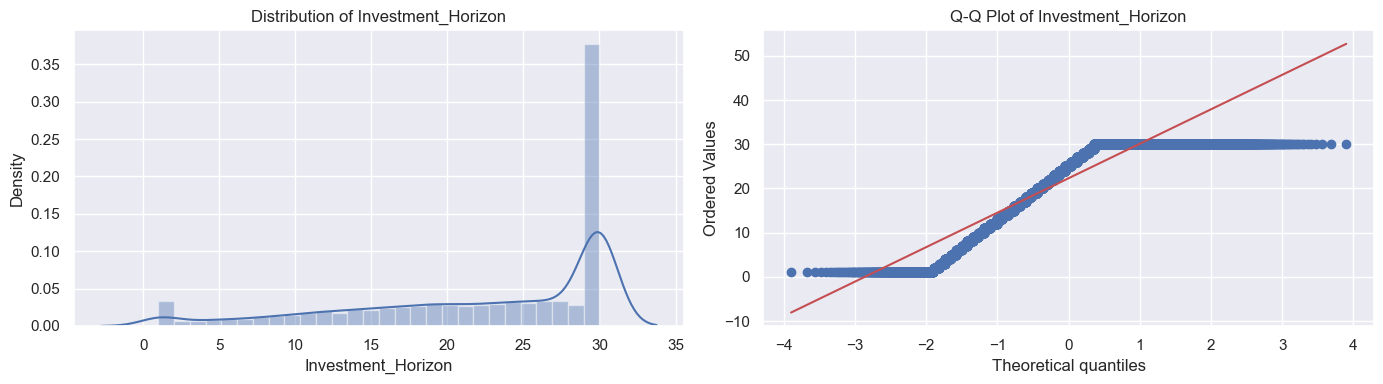

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\3337626576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


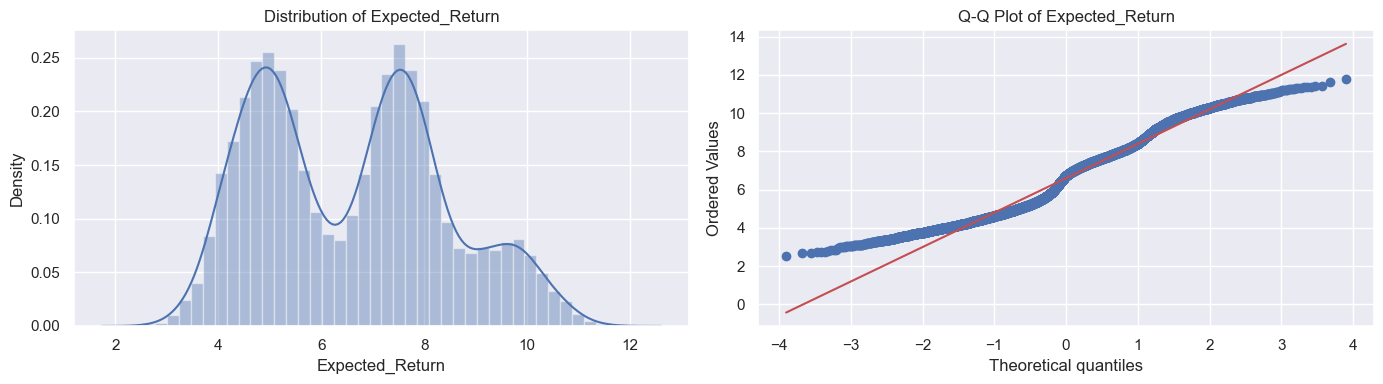

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\3337626576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])  # `sns.distplot` is deprecated


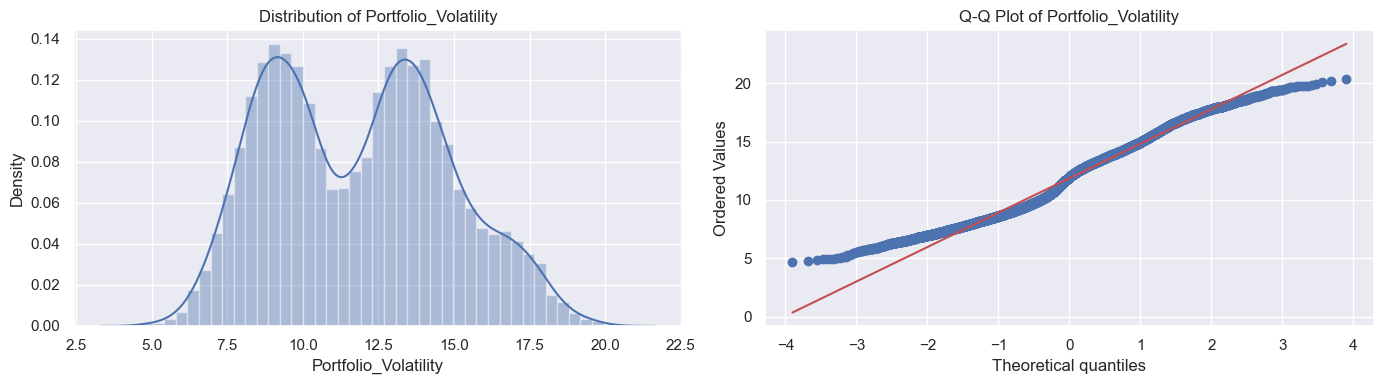

In [10]:
numeric_cols = X_train.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(14, 4))
    
    plt.subplot(121)
    sns.distplot(X_train[col])  # `sns.distplot` is deprecated
    plt.title(f'Distribution of {col}')
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    
    plt.tight_layout()
    plt.show()


# AFTER APPLYING LOG TRANSFORM 
** INTERPRETATION **
- COLUMNS THAT GET BETTER:-INCOME,NET_WORTH,EXPECTED_RETURNS,PORTFOLIO_VOLATILITY
- COLUMNS THAT GET WORST:-AGE,INVESTMENT_HORIZON

In [11]:
print(type(X_train))
print(X_train.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
['Income', 'Age', 'Risk_Appetite', 'Net_Worth', 'Investment_Horizon', 'Expected_Return', 'Portfolio_Volatility']


# WE HAVE APPLIED YEO_JOHNSON(I HAVE DELETED THAT PART AFTER APPLYING) BUT STILL Investment_Horizon WAS NOT NORMALIZED 
** INTERPRETATION **
- WE WILL APPLY BINNING(QUANTILE) ON Investment_Horizon

In [16]:
log_cols = ['Income', 'Net_Worth', 'Expected_Return', 'Portfolio_Volatility']
binning = ['Investment_Horizon']
ordinal = ['Risk_Appetite']
scale_only = ['Age']

trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), log_cols),
    ('binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), binning),
    ('ordinal', OrdinalEncoder(categories=[['Low', 'Medium', 'High']]), ordinal),
    ('scale', StandardScaler(), scale_only)
], remainder='passthrough') 

trf3=LinearRegression()

# AFTER APPLYING ALL THE ABOVE OPERATIONS IN TRF2 WE HAVE TO FIT AND TRANSFORM THEM
X_train_transformed2 = trf2.fit_transform(X_train)
X_train_transformed2 = pd.DataFrame(X_train_transformed2)

# IMP

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\2989409767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


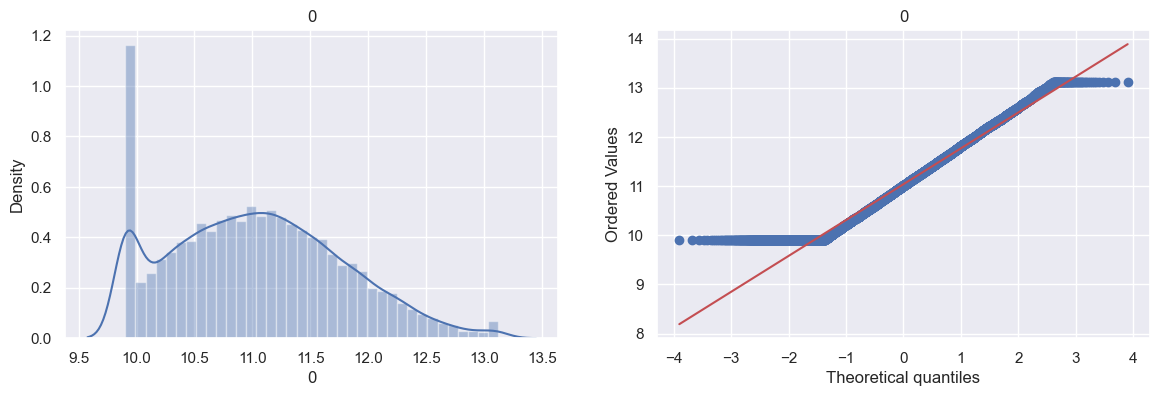

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\2989409767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


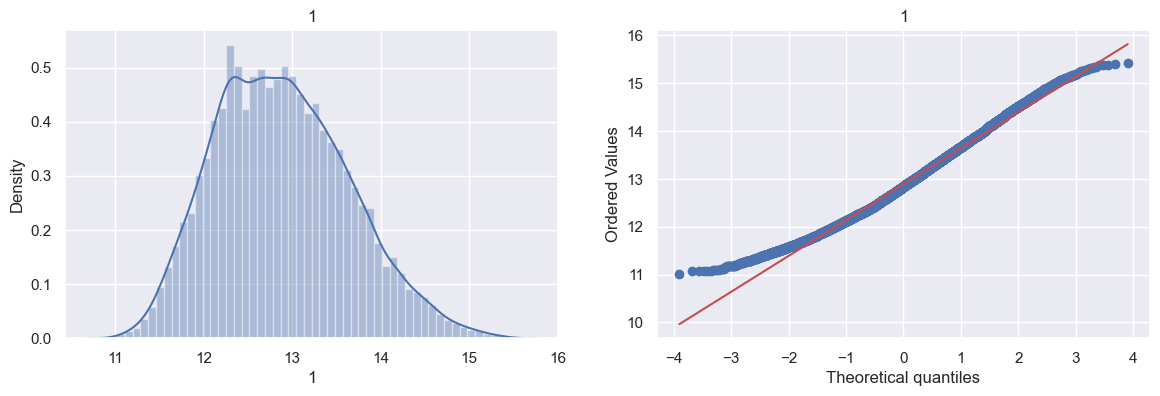

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\2989409767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


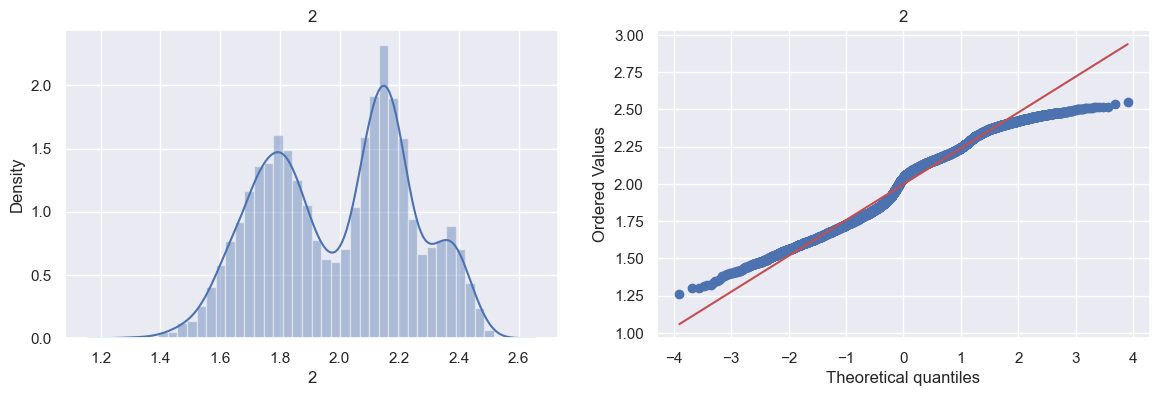

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\2989409767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


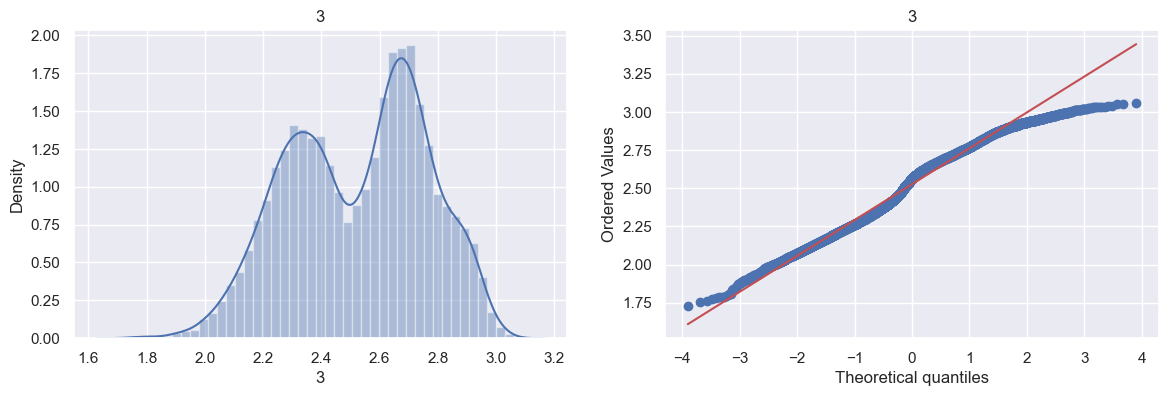

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\2989409767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


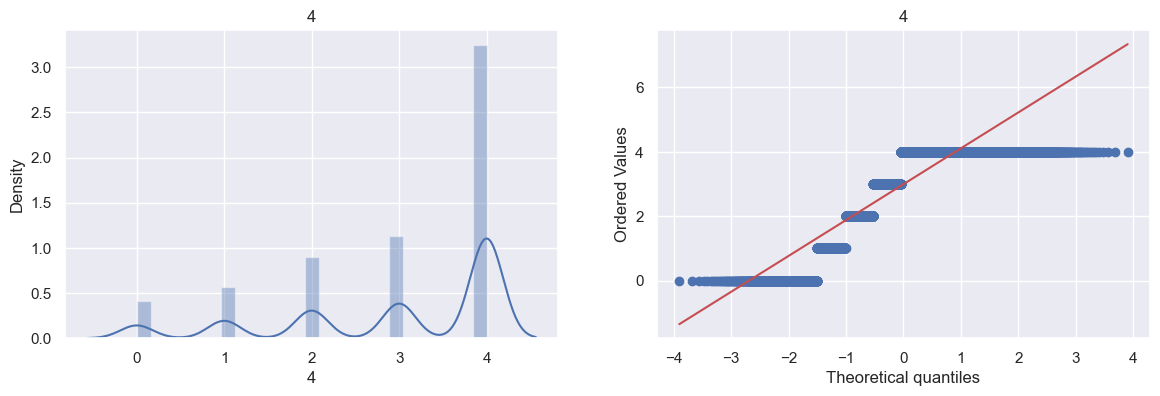

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\2989409767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


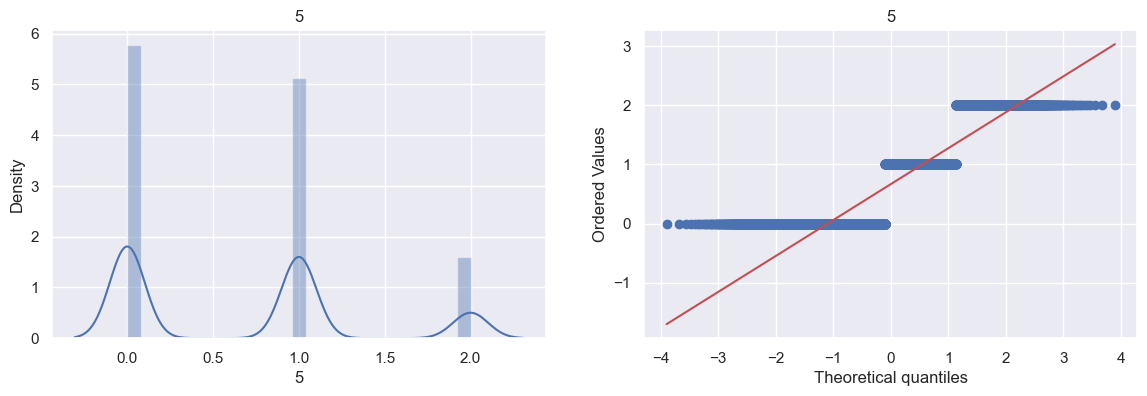

C:\Users\tanish\AppData\Local\Temp\ipykernel_156732\2989409767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


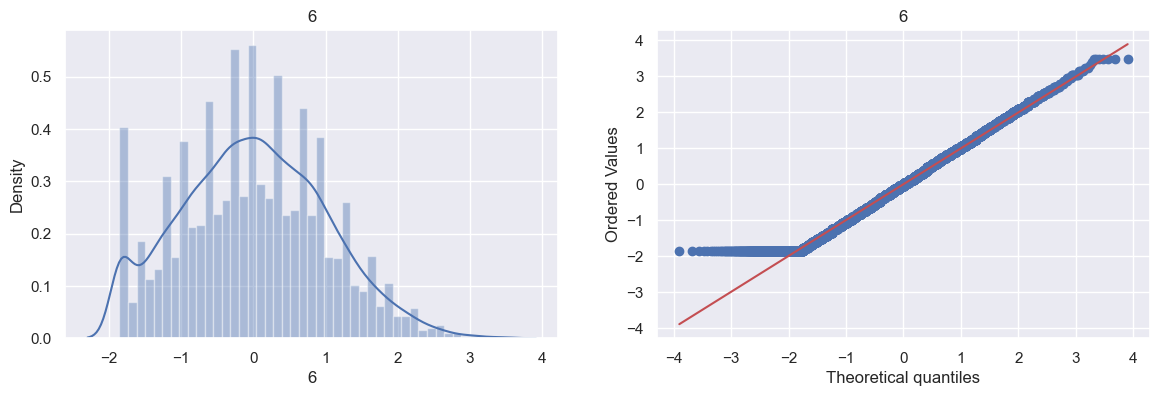

In [18]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed2[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# PIPELINE CREATION

In [19]:
from sklearn import set_config
set_config(display='diagram')

In [20]:
pipe = Pipeline([
    ('trf2', trf2),
    ('trf3', LinearRegression())
])

In [21]:
print(type(X_train))  # should be <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [22]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Income', 'Net_Worth',
                                                   'Expected_Return',
                                                   'Portfolio_Volatility']),
                                                 ('binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'),
                                                  ['Investment_Horizon']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['Risk_Appetite']),
                                                 ('scale', StandardScaler(),
                                                  ['Age'])])),
                ('trf3', LinearRegression())])

In [23]:
y_pred=pipe.predict(X_test)
y_pred

array([[12.40174965, 32.10364678, 20.72046616,  8.02673437, 21.39006455,
         5.35732017],
       [42.02881243, 18.24033187,  9.7793301 , 13.47599194,  9.35611608,
         7.119412  ],
       [13.69958078, 32.02833397, 20.24815216,  8.18804119, 20.47196023,
         5.36388805],
       ...,
       [35.42583477, 19.49482281, 12.04528092, 11.82675142, 13.76348695,
         7.44384555],
       [13.88352369, 31.68711251, 20.42964627,  8.20877793, 20.6055255 ,
         5.18534268],
       [12.65173467, 30.80443968, 21.50768908,  7.78623436, 22.29556932,
         4.95430253]])

# MODEL TRAINING COMPLETED NOW TESTING 

In [24]:
pickle.dump(pipe, open('Fund_Allocation.pk3', 'wb'))